# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

ImportError: DLL load failed while importing _imaging: Não foi possível encontrar o módulo especificado.

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
sinasc_raw = pd.read_csv("./input/SINASC_RO_2019.csv")
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [ ]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
sinasc_raw["faixa_latitude"] = pd.cut(
    sinasc_raw["munResLat"],
    bins=[-float("inf"), -10.5, float("inf")],
    labels=["Abaixo de -10.5", "Acima de -10.5"],
)

In [ ]:
resultados = sinasc_raw.groupby("faixa_latitude").agg(
    {
        "IDADEMAE": [
            ("soma", "sum"),
            ("média", "mean"),
            ("mínimo", "min"),
            ("máximo", "max"),
            ("mediana", "median"),
            ("desvio padrão", "std"),
            ("variância", "var"),
        ],
        "QTDFILVIVO":[
            ("soma", "sum"),
            ("média", "mean"),
            ("mínimo", "min"),
            ("máximo", "max"),
            ("mediana", "median"),
            ("desvio padrão", "std"),
            ("variância", "var")]
    },
)
resultados.head()

C:\Users\hfasa\AppData\Local\Temp\ipykernel_6288\215053699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados = sinasc_raw.groupby("faixa_latitude").agg(


IDADEMAE                                                 \
                    soma      média mínimo máximo mediana desvio padrão   
faixa_latitude                                                            
Abaixo de -10.5   340143  26.178943     12     53    26.0      6.320385   
Acima de -10.5    365094  26.014964     11     52    25.0      6.447663   

                           QTDFILVIVO                                  \
                 variância       soma     média mínimo máximo mediana   
faixa_latitude                                                          
Abaixo de -10.5  39.947272    12600.0  0.980011    0.0   30.0     1.0   
Acima de -10.5   41.572355    14226.0  1.129317    0.0   12.0     1.0   

                                         
                desvio padrão variância  
faixa_latitude                           
Abaixo de -10.5      1.138300  1.295727  
Acima de -10.5       1.198613  1.436674

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [ ]:
sinasc_raw["faixa_area"] = pd.cut(
    sinasc_raw["munResArea"],
    bins=[-float("inf"), 3000, float("inf")],
    labels=["Abaixo de 3000", "Acima de 3000"],
)

In [ ]:
resultados = sinasc_raw.groupby('faixa_area').agg({'KOTELCHUCK': [
            ("soma", "sum"),
            ("média", "mean"),
            ("mínimo", "min"),
            ("máximo", "max"),
            ("mediana", "median"),
            ("desvio padrão", "std"),
            ("variância", "var")
        ], 'QTDFILMORT':[
            ("soma", "sum"),
            ("média", "mean"),
            ("mínimo", "min"),
            ("máximo", "max"),
            ("mediana", "median"),
            ("desvio padrão", "std"),
            ("variância", "var"),
]})

resultados.head()

C:\Users\hfasa\AppData\Local\Temp\ipykernel_6288\130797693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultados = sinasc_raw.groupby('faixa_area').agg({'KOTELCHUCK': [


KOTELCHUCK                                                \
                     soma     média mínimo máximo mediana desvio padrão   
faixa_area                                                                
Abaixo de 3000      24494  4.693236      1      9     5.0      1.456135   
Acima de 3000      109968  5.042553      1      9     5.0      2.182659   

                         QTDFILMORT                                  \
               variância       soma     média mínimo máximo mediana   
faixa_area                                                            
Abaixo de 3000  2.120328     1260.0  0.244803    0.0    4.0     0.0   
Acima de 3000   4.763998     5383.0  0.272116    0.0   28.0     0.0   

                                        
               desvio padrão variância  
faixa_area                              
Abaixo de 3000      0.551215  0.303838  
Acima de 3000       0.629081  0.395743

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [ ]:
min_altitude = sinasc_raw['munResAlt'].min()
min_altitude

max_altitude = sinasc_raw['munResAlt'].max()
max_altitude

print(f"Menor valor de munResAlt: {min_altitude}")
print(f"Maior valor de munResAlt: {max_altitude}")

Menor valor de munResAlt: 85.0
Maior valor de munResAlt: 595.0


In [ ]:
sinasc_raw["faixa_de_altitude"] = pd.cut(
    sinasc_raw["munResAlt"],
    bins=[-float("inf"), 100, 300, 500, float("inf")],
    labels=["Abaixo de 100", "Entre 100 e 300", "Entre 300 e 500", "Acima de 500"],
)

In [ ]:
sinasc_raw.groupby('faixa_de_altitude').agg({'KOTELCHUCK': [
            ("soma", "sum"),
            ("média", "mean"),
            ("mínimo", "min"),
            ("máximo", "max"),
            ("mediana", "median"),
            ("desvio padrão", "std"),
            ("variância", "var")
        ], 'IDADEMAE':[
            ("soma", "sum"),
            ("média", "mean"),
            ("mínimo", "min"),
            ("máximo", "max"),
            ("mediana", "median"),
            ("desvio padrão", "std"),
            ("variância", "var"),
]})

C:\Users\hfasa\AppData\Local\Temp\ipykernel_6288\2024215616.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc_raw.groupby('faixa_de_altitude').agg({'KOTELCHUCK': [


KOTELCHUCK                                                \
                        soma     média mínimo máximo mediana desvio padrão   
faixa_de_altitude                                                            
Abaixo de 100          48741  5.486998      1      9     5.0      2.704281   
Entre 100 e 300        74687  4.770199      1      9     5.0      1.625306   
Entre 300 e 500         4149  4.625418      1      9     5.0      1.532440   
Acima de 500            6885  4.330189      1      9     5.0      1.439716   

                            IDADEMAE                                   \
                  variância     soma      média mínimo máximo mediana   
faixa_de_altitude                                                       
Abaixo de 100      7.313133   233348  26.269053     12     47    26.0   
Entre 100 e 300    2.641618   406483  25.961742     11     53    25.0   
Entre 300 e 500    2.348371    23376  26.060201     13     53    25.0   
Acima de 500       2.072782    42030  26.433962     14     46    26.0   

                                            
                  desvio padrão  variância  
faixa_de_altitude                           
Abaixo de 100          6.548599  42.884144  
Entre 100 e 300        6.295504  39.633373  
Entre 300 e 500        6.438822  41.458425  
Acima de 500           6.310937  39.827921

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [ ]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
}
set(imediatas.values())

{'Ariquemes', 'Cacoal', 'Jaru', 'Ji-Paraná', 'Porto Velho', 'Vilhena'}

In [ ]:
sinasc_raw['regiao_imediata'] = sinasc_raw['munResNome'].map(imediatas)

In [ ]:
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [ ]:
sinasc_raw['ano_mes'] = sinasc_raw['DTNASC'].dt.to_period('M')

In [ ]:
idade_media = sinasc_raw.groupby(['ano_mes', 'regiao_imediata'])['IDADEMAE'].mean().unstack()
idade_media

regiao_imediata,Ariquemes,Cacoal,Jaru,Ji-Paraná,Porto Velho,Vilhena
ano_mes,,,,,,
2019-01,24.866412,26.350543,26.086667,25.792056,26.017668,26.665049
2019-02,25.316239,25.969444,25.586777,26.417949,26.215000,26.781818
2019-03,25.288660,26.319410,26.215686,25.490364,26.347207,26.386667
2019-04,25.411972,26.235149,25.291667,26.075862,26.172336,26.686099
2019-05,25.410256,26.031008,25.187050,25.931264,25.830470,25.586207
2019-06,26.652510,25.845333,26.055944,26.272727,26.421628,26.526627
2019-07,24.973783,26.780488,24.611111,25.809399,26.139903,26.373057
2019-08,25.684615,26.539106,25.864865,25.938144,26.070588,26.297436
2019-09,25.561644,26.779126,25.748299,25.640177,25.966435,26.407407


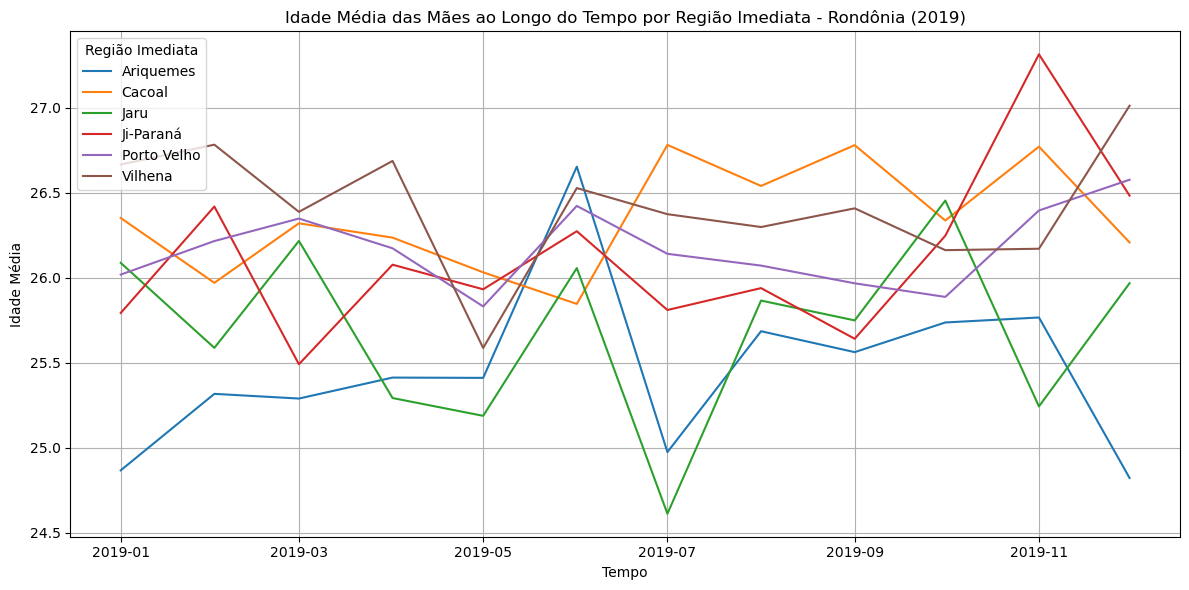

In [ ]:
plt.figure(figsize=(12,6))
for regiao in idade_media.columns:
    plt.plot(idade_media.index.to_timestamp(), idade_media[regiao], label=regiao)
    
plt.title('Idade Média das Mães ao Longo do Tempo por Região Imediata - Rondônia (2019)')

plt.xlabel('Tempo')

plt.ylabel('Idade Média')

plt.legend(title='Região Imediata')

plt.grid(True)

plt.tight_layout()

plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [ ]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M'
tables = pd.read_html(url)

In [ ]:
idh_table = tables[0]
idh_table.columns = ['Posição', 'Município', 'IDH', 'IDH_Renda', 'IDH_Longevidade', 'IDH_Educação']
idh_table = idh_table[['Posição', 'Município', 'IDH']].copy()
idh_table

,Posição,Município,IDH
0,nenhum município,nenhum município,nenhum município
1,IDH-M alto,IDH-M alto,IDH-M alto
2,1,Porto Velho,0.736
3,2,Vilhena,0.731
4,3,Cacoal,0.718
5,4,Ji-Paraná,0.714
6,5,Pimenta Bueno,0.710
7,6,Ariquemes,0.702
8,7,Rolim de Moura,0.700
9,IDH-M médio,IDH-M médio,IDH-M médio


In [ ]:
idh_table.loc[:,'IDH'] = pd.to_numeric(idh_table['IDH'], errors='coerce')
idh_table.dropna(subset=['IDH'],inplace=True)
idh_table

,Posição,Município,IDH
2,1,Porto Velho,0.736
3,2,Vilhena,0.731
4,3,Cacoal,0.718
5,4,Ji-Paraná,0.714
6,5,Pimenta Bueno,0.71
7,6,Ariquemes,0.702
8,7,Rolim de Moura,0.7
10,8,Cerejeiras,0.692
11,9,Jaru,0.689
12,10,Colorado do Oeste,0.685


In [ ]:
def categorize_idh (idh):
    if idh < 0.500:
        return 'Muito Baixo'
    elif idh < 0.600:
        return 'Baixo'
    elif idh < 0.700:
        return 'Médio'
    elif idh < 0.800:
        return 'Alto'
    else:
        return 'Muito Alto'
    

In [ ]:
idh_table.loc[:,'faixa_idh'] = idh_table['IDH'].apply(categorize_idh)
idh_table.loc[idh_table['faixa_idh'] == 'Alto']

,Posição,Município,IDH,faixa_idh
2,1,Porto Velho,0.736,Alto
3,2,Vilhena,0.731,Alto
4,3,Cacoal,0.718,Alto
5,4,Ji-Paraná,0.714,Alto
6,5,Pimenta Bueno,0.71,Alto
7,6,Ariquemes,0.702,Alto
8,7,Rolim de Moura,0.7,Alto


In [ ]:
idh_table

,Posição,Município,IDH,faixa_idh
2,1,Porto Velho,0.736,Alto
3,2,Vilhena,0.731,Alto
4,3,Cacoal,0.718,Alto
5,4,Ji-Paraná,0.714,Alto
6,5,Pimenta Bueno,0.71,Alto
7,6,Ariquemes,0.702,Alto
8,7,Rolim de Moura,0.7,Alto
10,8,Cerejeiras,0.692,Médio
11,9,Jaru,0.689,Médio
12,10,Colorado do Oeste,0.685,Médio


### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [ ]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM'

In [ ]:
tables = pd.read_html(url)
ifdm_table = tables[0]
ifdm_table.columns = ['Posição', 'Município', 'IFDM_Consolidado_2013']
ifdm_table

,Posição,Município,IFDM_Consolidado_2013
0,nenhum município,nenhum município,nenhum município
1,Desenvolvimento moderado,Desenvolvimento moderado,Desenvolvimento moderado
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117
7,6º,Cacoal,0.7111
8,7º,Santa Luzia d'Oeste,0.6850
9,8º,Rolim de Moura,0.6785


In [ ]:
ifdm_table.loc[:,'IFDM_Consolidado_2013'] = pd.to_numeric(ifdm_table['IFDM_Consolidado_2013'], errors='coerce')
ifdm_table.dropna(subset=['IFDM_Consolidado_2013'], inplace=True)
ifdm_table

,Posição,Município,IFDM_Consolidado_2013
2,1º,Ariquemes,0.7746
3,2º,Vilhena,0.7465
4,3º,Pimenta Bueno,0.7383
5,4º,Porto Velho,0.7257
6,5º,Ji-Paraná,0.7117
7,6º,Cacoal,0.7111
8,7º,Santa Luzia d'Oeste,0.685
9,8º,Rolim de Moura,0.6785
10,9º,Chupinguaia,0.6766
11,10º,São Miguel do Guaporé,0.6699


In [ ]:
def categorize_ifdm(ifdm):
        if ifdm < 0.4:
            return 'Baixo'
        elif ifdm < 0.6:
            return 'Regular'
        elif ifdm < 0.8:
            return 'Moderado'
        else:
            return 'Alto'

In [ ]:
ifdm_table.loc[:,'faixa_ifdm'] = ifdm_table['IFDM_Consolidado_2013'].apply(categorize_ifdm)
ifdm_table.loc[ifdm_table['faixa_ifdm'] == 'Regular']

,Posição,Município,IFDM_Consolidado_2013,faixa_ifdm
29,27º,Espigão d'Oeste,0.5973,Regular
30,28º,Seringueiras,0.5922,Regular
31,29º,Alvorada d'Oeste,0.5919,Regular
32,30º,Itapuã do Oeste,0.5903,Regular
33,31º,Cabixi,0.5887,Regular
34,32º,Novo Horizonte do Oeste,0.5858,Regular
35,33º,Nova Brasilândia d'Oeste,0.5857,Regular
36,34º,Vale do Paraíso,0.5818,Regular
37,35º,Corumbiara,0.5759,Regular
38,36º,Alto Paraíso,0.5735,Regular


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [7]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB'

In [8]:
tables = pd.read_html(url)

In [9]:
acima_de_1_bilhao = tables[0]
acima_de_500_milhoes = tables[1]
acima_de_300_milhoes = tables[2]
acima_de_200_milhoes = tables[3]
acima_de_100_milhoes = tables[4]
ate_100_milhoes = tables[5]


In [11]:
pib_tables = pd.concat([acima_de_1_bilhao, acima_de_500_milhoes, acima_de_300_milhoes, acima_de_200_milhoes, acima_de_100_milhoes, ate_100_milhoes], axis=0)

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

3 Insights:

 * Percebe-se que a quantidade de mulheres casadas é praticamente igual à de mulheres solteiras, mas as que estão em união estável acabam aparecendo em um número similar. Isso sugere que a maioria das mães nesse banco de dados está em algum tipo de relacionamento, seja como casada ou em união estável. Ao observarmos os dados mais de perto, vemos que a maioria das mulheres em união estável tem menos de 25 anos, enquanto as casadas tendem a ser um pouco mais velhas, com idades acima dos 28 anos, como podemos ver na plotagem abaixo

* Assim como aquelas que se encontram em união estável, as solteiras em sua grande maioria se encontram abaixo dos 25 anos.

* Percebe-se que nos municípios com menor PIB as mulheres que têm filhos costumam ser mais velhas. A média de idade atinge um pico nas cidades com maior produção econômica, enquanto nos lugares com PIB menor o número de nascimentos é mais baixo, mas a idade das mães pode ser bem elevada, chegando a picos acima dos 50 anos.

* Insight: Percebe-se que a quantidade de mulheres casadas é praticamente igual à de mulheres solteiras, mas as que estão em união estável acabam aparecendo em um número similar. Isso sugere que a maioria das mães nesse banco de dados está em algum tipo de relacionamento, seja como casada ou em união estável. Ao observarmos os dados mais de perto, vemos que a maioria das mulheres em união estável tem menos de 25 anos, enquanto as casadas tendem a ser um pouco mais velhas, com idades acima dos 28 anos, como podemos ver na plotagem abaixo

* Insight: Assim como aquelas que se encontram em união estável, as solteiras em sua grande maioria se encontram abaixo dos 25 anos.

* Insight: Percebe-se que nos municípios com menor PIB as mulheres que têm filhos costumam ser mais velhas. A média de idade atinge um pico nas cidades com maior produção econômica, enquanto nos lugares com PIB menor o número de nascimentos é mais baixo, mas a idade das mães pode ser bem elevada, chegando a picos acima dos 50 anos.